# Principal Component Analysis

PCA is a dimensionality reduction technique; it lets you distill multi-dimensional data down to fewer dimensions, selecting new dimensions that preserve variance in the data as best it can.

We're not talking about Star Trek stuff here; let's make it real - a black & white image for example, contains three dimensions of data: X position, Y position, and brightness at each point. Distilling that down to two dimensions can be useful for things like image compression and facial recognition, because it distills out the information that contributes most to the variance in the data set.

Let's do this with a simpler example: the Iris data set that comes with scikit-learn. It's just a small collection of data that has four dimensions of data for three different kinds of Iris flowers: The length and width of both the petals and sepals of many individual flowers from each species. Let's load it up and have a look:

In [1]:
from sklearn.datasets import load_iris  #importa a funcao para carregar o conjunto de dados iris
from sklearn.decomposition import PCA  #importa a classe de PCA (redução de dimensionalidade)
import pylab as pl  #importa a biblioteca para visualização grafica
from itertools import cycle  #importa a funcao cycle para criar ciclos infinitos em listas

iris = load_iris()  #carrega o conjunto de dados iris

numSamples, numFeatures = iris.data.shape  #guarda o número de amostras (linhas) e o número de características (colunas)
print(numSamples)  #exibe o nemero de amostras no conjunto de dados(150)
print(numFeatures)  #motra o numero de dimensoes(4)
print(list(iris.target_names))  #mostra os nomes das espécies no conjunto de dados


150
4
['setosa', 'versicolor', 'virginica']


So, this tells us our data set has 150 samples (individual flowers) in it. It has 4 dimensions - called features here, and three distinct Iris species that each flower is classified into.

While we can visualize 2 or even 3 dimensions of data pretty easily, visualizing 4D data isn't something our brains can do. So let's distill this down to 2 dimensions, and see how well it works:

In [6]:
X = iris.data  #atribui os dados numericos do conjunto iris 
pca = PCA(n_components=2, whiten=True).fit(X)  #cria e ajusta um modelo PCA para reduzir as dimensões para 2
X_pca = pca.transform(X)  # Aplica a transformação PCA nos dados originais, reduzindo-os para 2 componentes principais


What we have done is distill our 4D data set down to 2D, by projecting it down to two orthogonal 4D vectors that make up the basis of our new 2D projection. We can see what those 4D vectors are, although it's not something you can really wrap your head around:

In [7]:
#imprime os componentes principais 
print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


Let's see how much information we've managed to preserve:

In [8]:
#imprime a presencacao da variacao dos dados dando em porcentagaem a variacao
print(pca.explained_variance_ratio_)
#soma a porcentagem das duas dimensoes
print(sum(pca.explained_variance_ratio_))

[0.92461872 0.05306648]
0.977685206318795


That's pretty cool. Although we have thrown away two of our four dimensions, PCA has chosen the remaining two dimensions well enough that we've captured 92% of the variance in our data in a single dimension alone! The second dimension just gives us an additional 5%; altogether we've only really lost less than 3% of the variance in our data by projecting it down to two dimensions.

As promised, now that we have a 2D representation of our data, we can plot it:

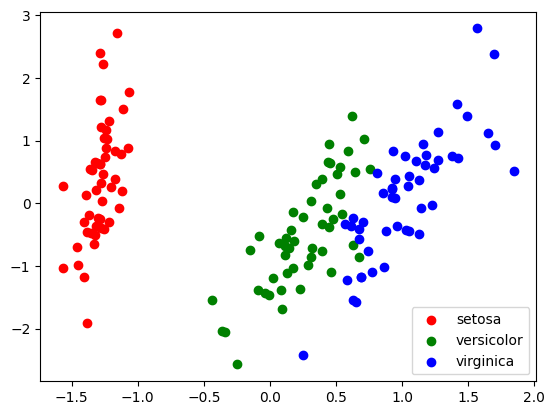

In [9]:
%matplotlib inline  
from pylab import *  #visualização e manipulação de dados

colors = cycle('rgb')  # Define um ciclo infinito de cores(vermelho, verde e azul)
target_ids = range(len(iris.target_names))  # Gera uma lista de IDs para cada classe-alvo (0, 1, 2)

pl.figure()  # Cria uma nova figura para plotagem
for i, c, label in zip(target_ids, colors, iris.target_names):  # Itera pelos IDs, cores e rótulos das classes
    pl.scatter(  # Plota os pontos para cada classe
        X_pca[iris.target == i, 0],  # Componente principais do eixo x das amostras pertencentes a classe atual
        X_pca[iris.target == i, 1],  # Componente principais do eixo y das amostras pertencentes a classe atual
        c=c,  # cor dos pontos correspondente a classe
        label=label  # Rotulo da classe para a legenda
    )
pl.legend()  
pl.show()  


You can see the three different types of Iris are still clustered pretty well. If you think about it, this probably works well because the overall size of an individual flower probably makes both the petal and sepal sizes increase by a similar amount. Although the actual numbers on this graph have no intuitive meaning, what we're probably seeing is measure of the ratio of width to height for petals and sepals - and PCA distilled our data down to that on its own.

## Activity

Our results suggest we could actually distill this data down to a single dimension and still preserve most of its variance. Try it! Do a PCA down to one component, and measure the results.

In [11]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Carregando os dados
iris = load_iris()
X = iris.data

# Realizando o PCA para 1 componente
pca = PCA(n_components=1).fit(X)
X_pca_1d = pca.transform(X)

# Verificando a variância explicada
explained_variance = pca.explained_variance_ratio_[0] * 100  # percentual da variancia explicada pelo unico componente

explained_variance


92.46187232017272

In [ ]:
#manteve boa parte da porcentagem